In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
experiment_dir = '/Users/vitto/Desktop/SEM1YEAR4/MLP/mlpractical'

In [2]:
def collect_experiment_dicts(target_dir, test_flag=False):
    experiment_dicts = dict()
    for subdir, dir, files in os.walk(target_dir):
        for file in files:
            filepath = None
            if not test_flag:
                if file == 'summary.csv':
                    filepath = os.path.join(subdir, file)
            
            elif test_flag:
                if file == 'test_summary.csv':
                    filepath = os.path.join(subdir, file)
            
            if filepath is not None:
                
                with open(filepath, 'r') as read_file:
                    lines = read_file.readlines()
                    
                current_experiment_dict = {key: [] for key in lines[0].replace('\n', '').split(',')}
                idx_to_key = {idx: key for idx, key in enumerate(lines[0].replace('\n', '').split(','))}
                
                for line in lines[1:]:
                    for idx, value in enumerate(line.replace('\n', '').split(',')):
                        current_experiment_dict[idx_to_key[idx]].append(float(value))
                
                experiment_dicts[subdir.split('/')[-2]] = current_experiment_dict
                
    return experiment_dicts
                
            

In [3]:
result_dict = collect_experiment_dicts(target_dir=experiment_dir)
for key, value in result_dict.items():
    print(key, list(value.keys()))

VGG_08 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_38 ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_08_BN_experiment ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_08_experiment ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_38_BN_each_layer_experiment ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_38_experiment ['train_acc', 'train_loss', 'val_acc', 'val_loss']
VGG_38_BN_experiment ['train_acc', 'train_loss', 'val_acc', 'val_loss']


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_result_graphs(plot_name, stats, keys_to_plot, notebook=True):
    
    stats_dict = {}
    
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_loss', 'val_loss']:
            item = stats[name][k]
            ax_1.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(name, k))
            stats_dict["{}_{}".format(name, k)]  = np.min(item)
            
    ax_1.legend(loc=0)
    ax_1.set_ylabel('Loss')
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_acc', 'val_acc']:
            item = stats[name][k]
            ax_2.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(name, k))
            
            stats_dict["{}_{}".format(name, k)] = np.max(item)
            
    ax_2.legend(loc=0)
    ax_2.set_ylabel('Accuracy')
    ax_2.set_xlabel('Epoch number')
    
    fig_1.savefig('../results/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
    fig_2.savefig('../results/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
    return stats_dict
    
    

<ipython-input-21-7dc307fcd91a>:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_1.savefig('../results/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
<ipython-input-21-7dc307fcd91a>:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_1.savefig('../results/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
<ipython-input-21-7dc307fcd91a>:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_2.savefig('../results/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
<ipython-input-21-7dc307fcd91a>:42:

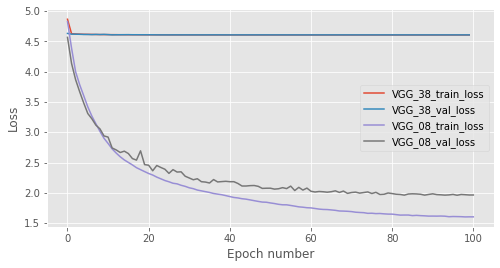

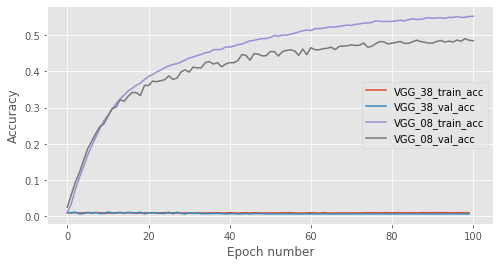

In [22]:
stats = plot_result_graphs('problem_model', result_dict, keys_to_plot=['VGG_38', 'VGG_08'])

In [23]:
stats

{'VGG_38_train_loss': 4.6051517,
 'VGG_38_val_loss': 4.60659,
 'VGG_08_train_loss': 1.6030664,
 'VGG_08_val_loss': 1.9604725,
 'VGG_38_train_acc': 0.010252631578947369,
 'VGG_38_val_acc': 0.011600000000000001,
 'VGG_08_train_acc': 0.552442105263158,
 'VGG_08_val_acc': 0.49079999999999996}

<ipython-input-21-7dc307fcd91a>:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_1.savefig('../results/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
<ipython-input-21-7dc307fcd91a>:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_1.savefig('../results/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
<ipython-input-21-7dc307fcd91a>:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_2.savefig('../results/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
<ipython-input-21-7dc307fcd91a>:42:

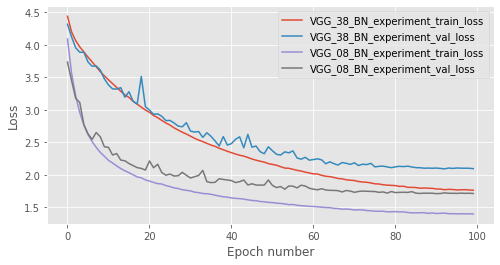

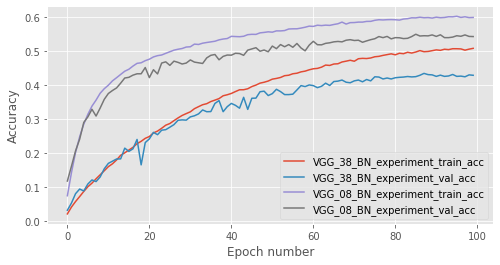

In [24]:
stats = plot_result_graphs('08_vs_38_bn_block', result_dict, keys_to_plot=['VGG_38_BN_experiment', 'VGG_08_BN_experiment'])

In [25]:
stats

{'VGG_38_BN_experiment_train_loss': 1.7605983,
 'VGG_38_BN_experiment_val_loss': 2.0897126,
 'VGG_08_BN_experiment_train_loss': 1.3950516,
 'VGG_08_BN_experiment_val_loss': 1.7074723,
 'VGG_38_BN_experiment_train_acc': 0.5085052631578948,
 'VGG_38_BN_experiment_val_acc': 0.43479999999999996,
 'VGG_08_BN_experiment_train_acc': 0.6029684210526316,
 'VGG_08_BN_experiment_val_acc': 0.55}

<ipython-input-21-7dc307fcd91a>:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_1.savefig('../results/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
<ipython-input-21-7dc307fcd91a>:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_1.savefig('../results/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
<ipython-input-21-7dc307fcd91a>:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_2.savefig('../results/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
<ipython-input-21-7dc307fcd91a>:42:

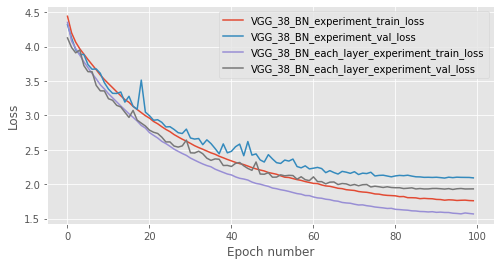

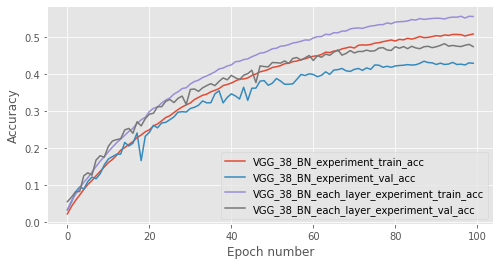

In [26]:
stats = plot_result_graphs('bn_block_vs_bn_layer', result_dict, keys_to_plot=['VGG_38_BN_experiment', 'VGG_38_BN_each_layer_experiment'])

In [27]:
stats

{'VGG_38_BN_experiment_train_loss': 1.7605983,
 'VGG_38_BN_experiment_val_loss': 2.0897126,
 'VGG_38_BN_each_layer_experiment_train_loss': 1.5687203,
 'VGG_38_BN_each_layer_experiment_val_loss': 1.9242086,
 'VGG_38_BN_experiment_train_acc': 0.5085052631578948,
 'VGG_38_BN_experiment_val_acc': 0.43479999999999996,
 'VGG_38_BN_each_layer_experiment_train_acc': 0.5566315789473685,
 'VGG_38_BN_each_layer_experiment_val_acc': 0.48239999999999994}

In [ ]:
train (47500, 32, 32, 3)
train (47500,)
Files already downloaded and verified
val (2500, 32, 32, 3)
val (2500,)
Files already downloaded and verified
test (10000, 32, 32, 3)
test (10000,)